# phenology vids 2

This version of phenology vids is for use on NCI, assuming that data has already been loaded with 01_pre-segment



In [1]:
import joblib

%matplotlib inline

import os
import datacube
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray  # activate the rio accessor

import datetime as dt
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../Tools/')
from dea_tools.temporal import xr_phenology, temporal_statistics
from dea_tools.datahandling import load_ard
from dea_tools.bandindices import calculate_indices
from dea_tools.plotting import display_map, rgb
from dea_tools.dask import create_local_dask_cluster

import pickle

from dea_tools.plotting import display_map, rgb, xr_animation
import skimage

# Plot animation
from IPython.display import Image
from IPython.core.display import Video


In [2]:
stub = 'fm_ndwi_5'
#out_path = 'Data/'
outdir = "/g/data/xe2/John/Data/PadSeg/" # best if output is stored in gdata


In [3]:
with open(outdir+stub+'_ds2.pkl', 'rb') as handle:
    ds = pickle.load(handle)


In [4]:
ds = ds.drop_vars(['oa_fmask',
                         'oa_azimuthal_exiting',
                         'oa_azimuthal_incident',
                         'oa_combined_terrain_shadow',
                         'oa_exiting_angle',
                         'oa_incident_angle',
                         'oa_relative_azimuth',
                         'oa_relative_slope',
                         'oa_satellite_azimuth',
                         'oa_satellite_view',
                         'oa_solar_azimuth',
                         'oa_solar_zenith',
                         'oa_time_delta',
                         'oa_s2cloudless_prob',
                         'oa_nbart_contiguity',
                         'oa_s2cloudless_mask',])
ds

<xarray.Dataset>
Dimensions:                (time: 236, y: 424, x: 386)
Coordinates:
  * time                   (time) datetime64[ns] 2019-01-05T00:06:11.826000 ....
  * y                      (y) float64 -4.132e+06 -4.132e+06 ... -4.136e+06
  * x                      (x) float64 1.432e+07 1.432e+07 ... 1.433e+07
    spatial_ref            int32 6933
Data variables: (12/25)
    nbart_coastal_aerosol  (time, y, x) float32 681.0 681.0 ... 349.0 349.0
    nbart_blue             (time, y, x) float32 800.0 780.0 ... 413.0 463.0
    nbart_green            (time, y, x) float32 1.091e+03 1.104e+03 ... 763.0
    nbart_red              (time, y, x) float32 1.456e+03 1.414e+03 ... 901.0
    nbart_red_edge_1       (time, y, x) float32 1.587e+03 ... 1.443e+03
    nbart_red_edge_2       (time, y, x) float32 1.822e+03 ... 2.131e+03
    ...                     ...
    MNDWI                  (time, y, x) float32 -0.5296 -0.5254 ... -0.5501
    NBR                    (time, y, x) float32 -0.06708 -0.07628 ... 0.2698
    NDCI                   (time, y, x) float32 0.04305 0.05765 ... 0.2312
    NDTI                   (time, y, x) float32 0.1616 0.1616 ... 0.2463 0.2463
    BSI                    (time, y, x) float32 0.2443 0.2499 ... 0.04469
    NDYI                   (time, y, x) float32 0.1539 0.172 ... 0.2824 0.2447
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

In [ ]:
### function to make video for a given index

In [5]:
the_var = 'NDVI'
ds_ = ds.resample(time="1W").interpolate("linear").interpolate_na(dim = 'time', method = 'linear')
ds_

<xarray.Dataset>
Dimensions:                (y: 424, x: 386, time: 157)
Coordinates:
  * y                      (y) float64 -4.132e+06 -4.132e+06 ... -4.136e+06
  * x                      (x) float64 1.432e+07 1.432e+07 ... 1.433e+07
    spatial_ref            int32 6933
  * time                   (time) datetime64[ns] 2019-01-06 ... 2022-01-02
Data variables: (12/25)
    nbart_coastal_aerosol  (time, y, x) float64 nan nan nan nan ... nan nan nan
    nbart_blue             (time, y, x) float64 nan nan nan nan ... nan nan nan
    nbart_green            (time, y, x) float64 nan nan nan nan ... nan nan nan
    nbart_red              (time, y, x) float64 nan nan nan nan ... nan nan nan
    nbart_red_edge_1       (time, y, x) float64 nan nan nan nan ... nan nan nan
    nbart_red_edge_2       (time, y, x) float64 nan nan nan nan ... nan nan nan
    ...                     ...
    MNDWI                  (time, y, x) float64 nan nan nan nan ... nan nan nan
    NBR                    (time, y, x) float64 nan nan nan nan ... nan nan nan
    NDCI                   (time, y, x) float64 nan nan nan nan ... nan nan nan
    NDTI                   (time, y, x) float64 nan nan nan nan ... nan nan nan
    BSI                    (time, y, x) float64 nan nan nan nan ... nan nan nan
    NDYI                   (time, y, x) float64 nan nan nan nan ... nan nan nan
Attributes:
    crs:           epsg:6933
    grid_mapping:  spatial_ref

Exporting animation to /g/data/xe2/John/Data/PadSeg/fm_ndwi_5NDVI_weekly.mp4


  0%|          | 0/20 (0.0 seconds remaining at ? frames/s)

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

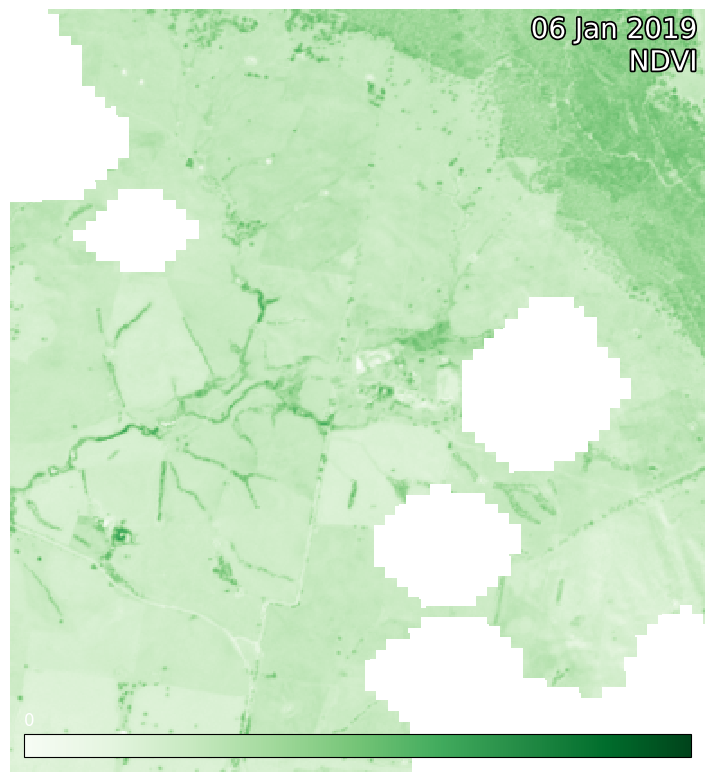

In [17]:
import ffmpeg
num_frames = 20 # for testing only
#num_frames = len(ds_weekly.time) # get total length from ds_weekly

output = outdir+stub+the_var+'_weekly.mp4'

xr_animation(ds_, 
             bands=['NDVI'], 
             output_path = output, 
             show_text = the_var,
             imshow_kwargs={"cmap": "Greens", "vmin": 0.0, "vmax": 1.0},
             limit=num_frames)

plt.close()
Video(output, embed=True)

# Problem with ffmpeg in the geospatenv tool. Unfortunate... 